# Lecture-IV:Numerical Analysis using Python

### Numerical Optimisation(Finding Roots)

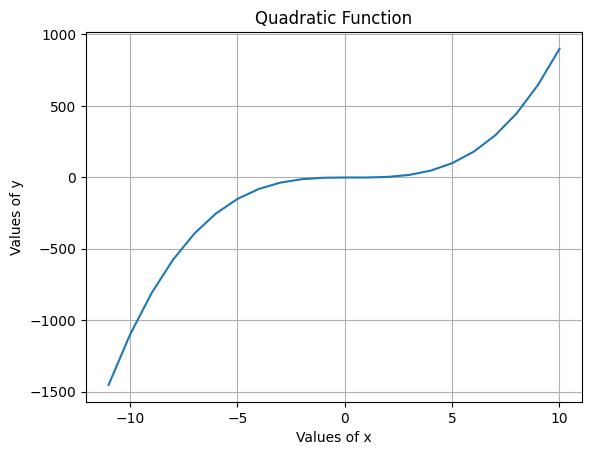

In [1]:
# To plot the function to find the maximum and minimum values of y=f(x)
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-11, 11, 1)
#a = 2
#b = -5
#c = 3
#y = a*(x ** 2) + b*x + c
y = x ** 3 - x ** 2 - 1
#print('Values of x: ', x)
#print('Values of y: ', y)
plt.plot(x, y)
plt.title("Quadratic Function")
plt.xlabel("Values of x")
plt.ylabel ("Values of y")
plt.grid(True)
plt.show()

# 2*(x ** 2) - 5*x + 3

In [4]:
#Code for finding root (Optimisation) by 'fsolve' module SCIPY package

import numpy as np
from scipy.optimize import fsolve
X = np.linspace(-10.0, 10.0,100)
x1 = float(input("Lower value of the root: "))
x2 = float(input("Higher value of the root: "))
def f(x):
    return x ** 3 - x ** 2 - 1
result = fsolve(f,[x1,x2])
print("fsolve gives the accuracy to be :", result[0])
print("fsolve gives the root to be :", result[1])

# 2*(x ** 2) - 5*x + 3

fsolve gives the accuracy to be : -0.0002927698435315489
fsolve gives the root to be : 1.4665709222073589


c:\Users\Prith\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


### Bisect method

In [8]:
#Theory: https://www.youtube.com/watch?v=pStQf71WwB4&t=62s
# Code for Bisection method
def equation(x):
    return x ** 3 - x ** 2 - 1
ym = float(input("Lower value of the root: "))
yp = float(input("Higher value of the root: "))

def bisection_method(f, ym,yp, tol):
    if f(ym)*f(yp) >0:
        print("No root found. ")
    else:
        counter = 0
        while (yp - ym) / 2.0 > tol:
            midpoint = (ym + yp) / 2.0

            if f(ym) * f(midpoint) < 0:
                yp = midpoint
            else:
                ym = midpoint
                counter += 1
        return(midpoint, counter)

root, accuracy = bisection_method(equation, ym, yp, 1e-4)
print("Root obtained using Bisection method :", root)
print("Iteration obtained using Bisection method :", accuracy)
#print("Root obtained using Bisection method :", answer, "\nfound in",iterations, "iterations")

Root obtained using Bisection method : 1.4654541015625
Iteration obtained using Bisection method : 10


### Newton-Raphson method

In [11]:
# Theory: https://www.youtube.com/watch?v=hZ4l5wXRV4g&t=2s

# Code for Newton-Rapson method (Method-I)
import math

def derivative(f, x, dx = 1e-6):
    df = f(x +dx) - f(x -dx)
    return df/(2*dx)

def newton(f, x0, tol = 1e-10, maxit = 100):

    x = x0
    fx = f(x)

    for _ in range(maxit):
        if abs(fx) < tol:
            break

        fpx = derivative(f, x)
        if abs(fpx) < tol:
            break

        x = x - fx/fpx
        fx = f(x)

    return x

func = lambda x: x ** 3 - x ** 2 - 1 # x ** 2 - math.exp(-x) - 1
x0 = int(input("Take an initil guess value:"))
x = newton(func, x0, tol =1e-10, maxit=100)
print("Solution: x ={}, f(x) ={}".format(x, func(x)))

Solution: x =1.4655712318767877, f(x) =6.927791673660977e-14


In [12]:
# Code for Newton-Raphson method (Mehtod-II)
import numpy as np
f = lambda x: x ** 2 - 2
f_prime = lambda x: 2*x
newton_raphson = 1.4 - (f(1.4))/(f_prime(1.4))
print("newton_raphson =", newton_raphson)
print("sqrt(2) =",np.sqrt(2))

newton_raphson = 1.4142857142857144
sqrt(2) = 1.4142135623730951


### Secant method

In [13]:
# Theory: https://www.youtube.com/watch?v=DbZ45Ej8YMw
#Q2. PROGRAM: #Secant Method-I
#https://www.math.ubc.ca/-pwalls/math-python/roots-optimization/secant/
def secant(f,a,b,N):
    if f(a)*f(b) >= 0:
        print("Secant method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n=m_n
            b_n=b_n
        elif f_m_n == 0:
            print("Found\_exact solution.")
            return m_n
        else:
            print("Secant method fails.")
            return None
    return a_n - f(a_n)*(b_n - a_n)/(f(b_n) - f(a_n))

p = lambda x: x ** 3 - x ** 2 - 1
print(p(1))
print(p(2))

approx = secant(p,1,2,20)
print (approx)

supergolden_ratio = (1 + ((29 + 3*93 ** 0.5)/2) ** (1/3) + ((29 - 3*93 ** 0.5)/2) ** (1/3))/3
print(supergolden_ratio)

error = abs(supergolden_ratio - approx)
print(error)

-1
3
1.4655712311394433
1.4655712318767682
7.373248678277378e-10


<>:20: SyntaxWarning: invalid escape sequence '\_'
<>:20: SyntaxWarning: invalid escape sequence '\_'
C:\Users\Prith\AppData\Local\Temp\ipykernel_3668\3072145569.py:20: SyntaxWarning: invalid escape sequence '\_'
  print("Found\_exact solution.")
